<a href="https://colab.research.google.com/github/tajski/Keras-konwulsyjne-sieci-neuronowe/blob/main/Cwiczenie2_42885.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W pierwszej kolejności zaczynamy oczywiście od importu potrzebnych bibliotek oraz przy użyciu modułu drive z biblioteki google.colab do zamontowania Dysku Google do naszego Colaba.

In [ ]:
import numpy as np
import pandas as pd
import os
from google.colab import drive
from matplotlib import pyplot as plt
from keras.utils import image_dataset_from_directory
from keras import layers, Model
from keras.models import Sequential
from keras.utils import plot_model
from keras.metrics import CategoricalAccuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Accuracy

In [ ]:
drive.mount('/content/drive', force_remount=True)
!unzip -q "/content/drive/MyDrive/Colab Notebooks/zwierzetas.zip"

Mounted at /content/drive
replace zwierzetas/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


Następnie następuje podział zbioru danych na dwa podzbiory: testowy oraz treningowy.

In [ ]:
train_data_root = "zwierzetas/train"
test_data_root = "zwierzetas/test"

train_data = {}
test_data = {}

# Przechodzenie przez katalogi treningowe
for root, dirs, files in os.walk(train_data_root):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        train_data[dir] = os.listdir(dir_path)

print("Dane treningowe:")
for x in train_data:
    print(x, len(train_data[x]))

# Przechodzenie przez katalogi testowe
for root, dirs, files in os.walk(test_data_root):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        test_data[dir] = os.listdir(dir_path)

print()

print("Dane testowe:")
for x in test_data:
    print(x, len(test_data[x]))

Dane treningowe:
wiewiórka 300
owca 300
krowa 300
kot 300
pies 300
motyl 300
koń 300
słoń 300
kurczak 300
pająk 300

Dane testowe:
wiewiórka 100
owca 100
krowa 100
kot 100
pies 100
motyl 100
koń 100
słoń 100
kurczak 100
pająk 100


W kolejnym kroku każdy z obrazów jest skalowany do rozmiaru 256x256 oraz kategoryzowany na podstawie etykiety.

In [ ]:
train_dataset, valid_dataset = image_dataset_from_directory(train_data_root, validation_split=0.2,
                                       subset='both',
                                       seed=1410,
                                       image_size=(256, 256),
                                       label_mode='categorical',
                                      color_mode="rgb"
                                       )

test_dataset = image_dataset_from_directory(test_data_root, seed=1410,
                                       image_size=(256, 256),
                                       label_mode='categorical',
                                      color_mode="rgb"
                                       )

Found 3000 files belonging to 10 classes.
Using 2400 files for training.
Using 600 files for validation.
Found 1000 files belonging to 10 classes.


Tworzymy podgląd pierwszych 16 wygenerowanych obrazów z etykietami:

['koń', 'kot', 'krowa', 'kurczak', 'motyl', 'owca', 'pająk', 'pies', 'słoń', 'wiewiórka']


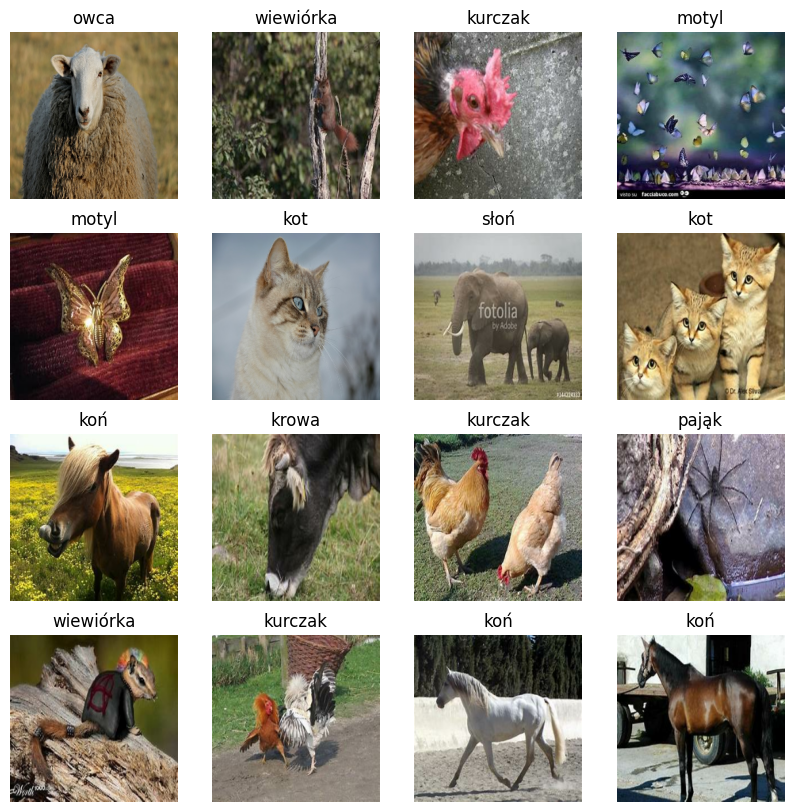

In [ ]:
class_names = train_dataset.class_names
print(class_names)

%matplotlib inline
fig, ax = plt.subplots(4,4, figsize=(10,10))


for images, labels in train_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(np.argmax(labels[i]))])
        plt.axis("off")

# **Budowanie, nauka i testowanie sieci**

W tej sekcji budowane są modele sieci zbudowane porównawczo z poprzednikami poprzez użycie różnych typów warstw oraz ich argumentów, takich jak:
warstwy konwolucyjne, warstwy normalizacji wsadowej, warstwy max pooling, warstwę spłaszczającą czy warstwy gęste.

W modelu pierwszym użyte są warstwy konwulcyjne

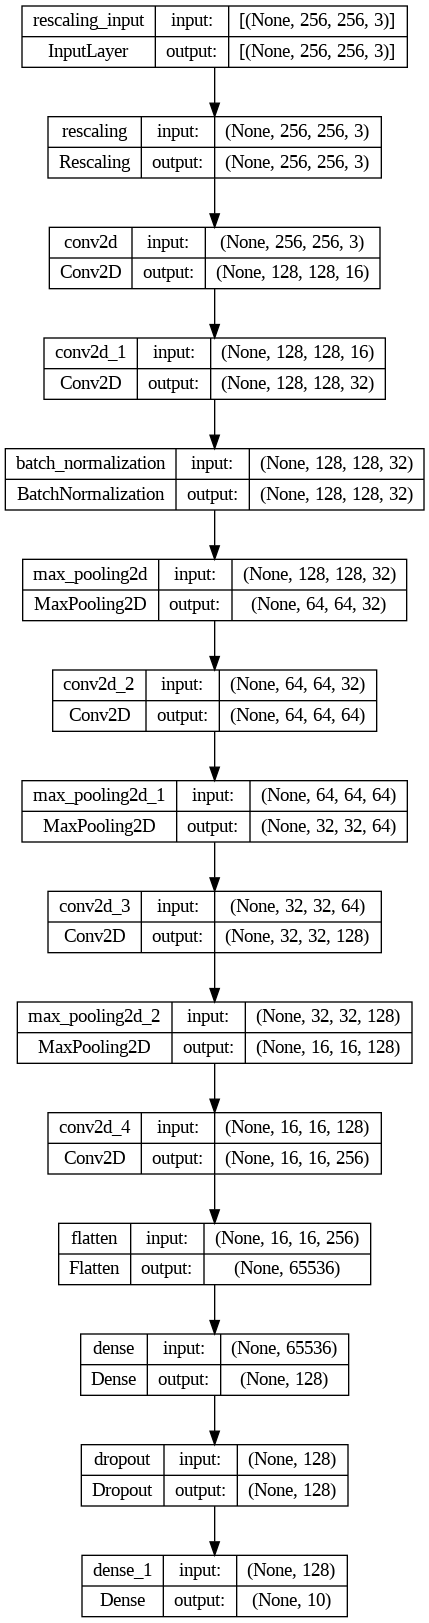

In [ ]:
model1 = Sequential([
    layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),
    layers.Conv2D(16, (32,32), strides=2, padding='same', activation="relu"),
    layers.Conv2D(32, (20,20), padding='same', activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, (10,10), padding='same', activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, (6,6), padding='same', activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(256, (3,3), padding='same', activation="relu"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])
plot_model(model1, show_shapes=True)

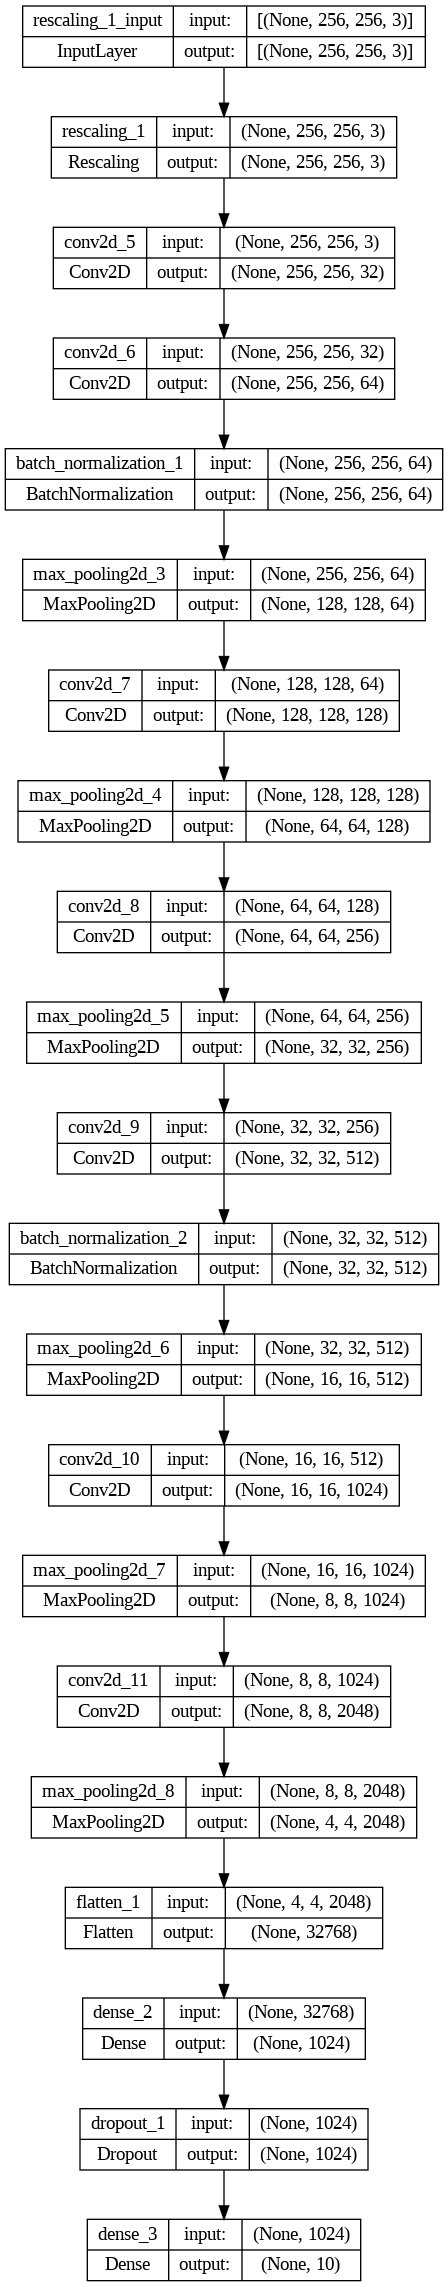

In [ ]:
model2 = Sequential([
  layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),
  layers.Conv2D(32, 3, strides=1, padding='same', activation="relu"),
  layers.Conv2D(64, 3, padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(128, 3, padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(256, 3, padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(512, 3, padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(1024, 3, padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(2048, 3, padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(1024, activation="relu"),
  layers.Dropout(0.7),
  layers.Dense(10, activation="softmax")
])
plot_model(model2, show_shapes=True)

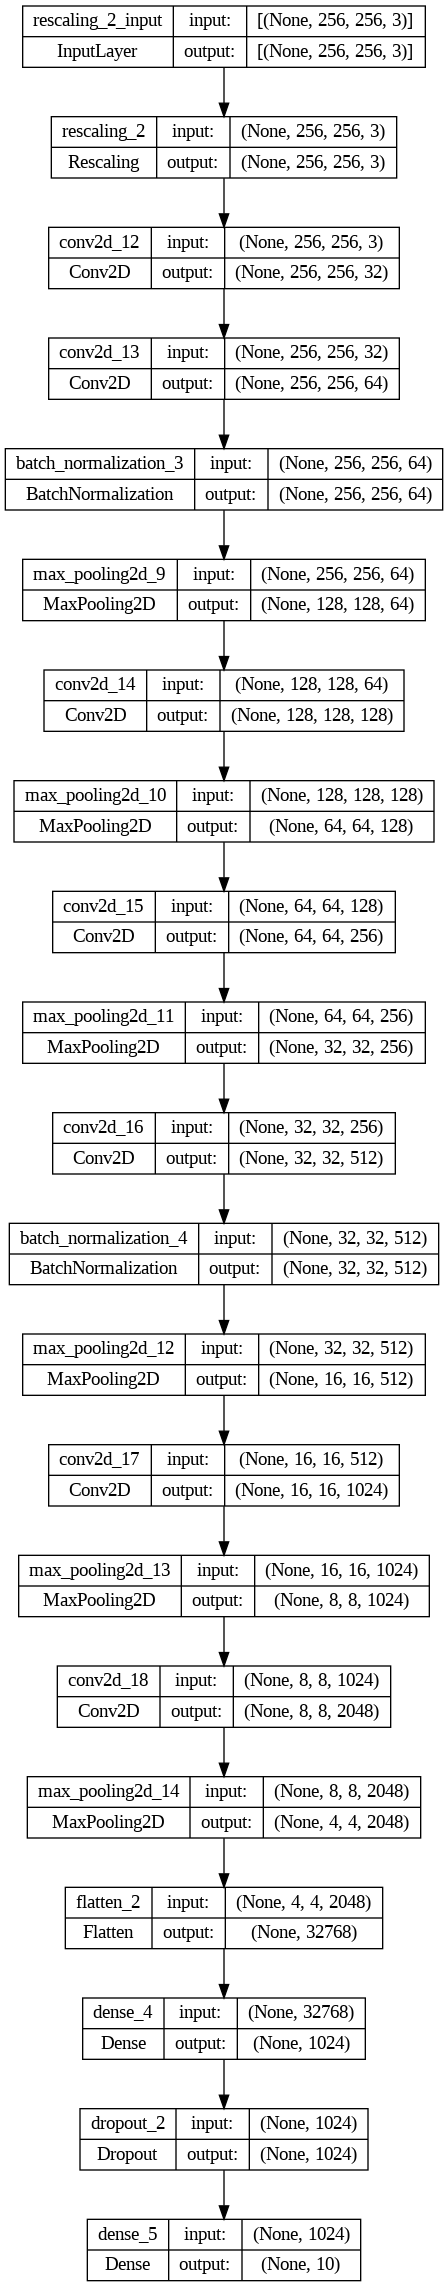

In [ ]:
model3 = Sequential([
  layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),
  layers.Conv2D(32, (2,2), strides=1, padding='same', activation="relu"),
  layers.Conv2D(64, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(128, (3,3), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(256, (3,3), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(512, (4,4), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(1024, (4,4), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(2048, (5,5), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(1024, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(10, activation="softmax")
])
plot_model(model3, show_shapes=True)

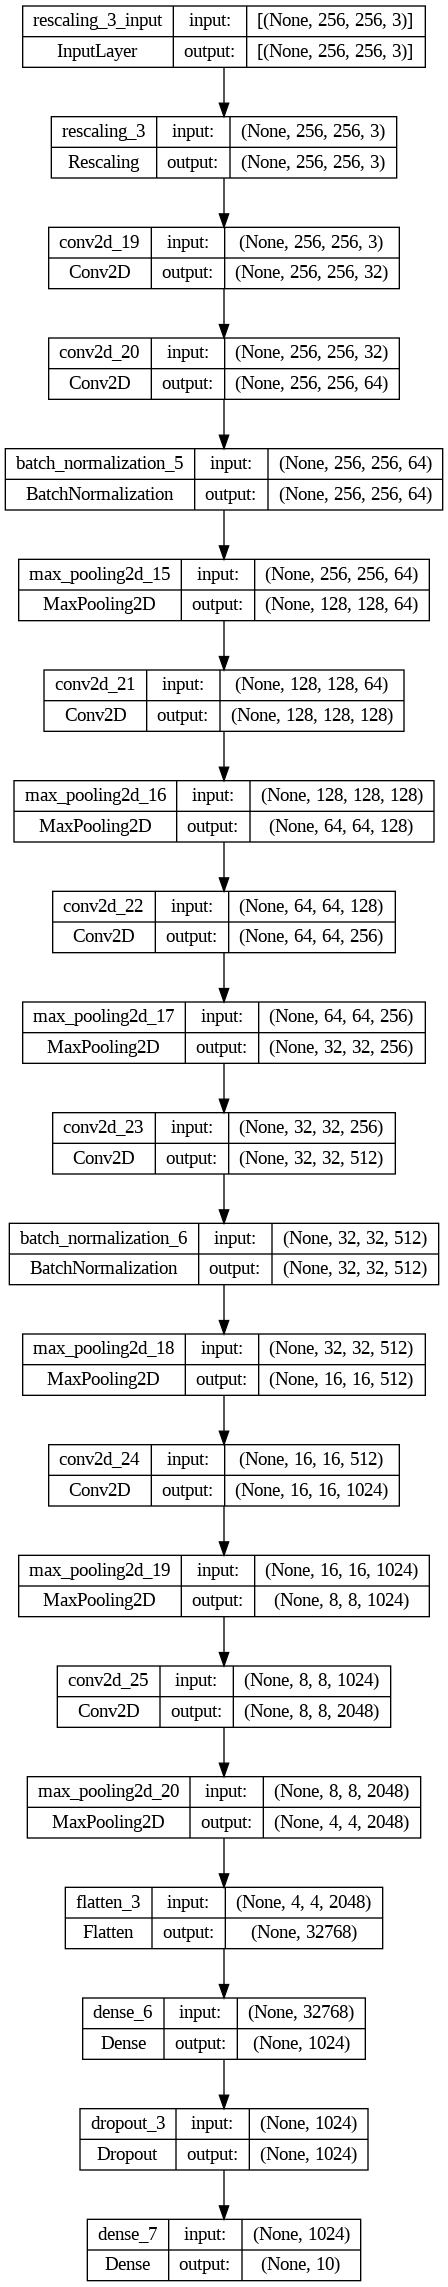

In [ ]:
model4 = Sequential([
  layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),
  layers.Conv2D(32, (2,2), strides=1, padding='same', activation="relu"),
  layers.Conv2D(64, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(128, (3,3), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(256, (3,3), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(512, (4,4), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(1024, (4,4), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(2048, (5,5), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(1024, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(10, activation="softmax")
])
plot_model(model4, show_shapes=True)

In [ ]:
# Kompilacja
model1.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
history1 = model1.fit(train_dataset, epochs=30, validation_data=valid_dataset,
                    batch_size=32)

Epoch 1/30
75/75 [==============================] - 15s 78ms/step - loss: 2.5916 - accuracy: 0.1329 - val_loss: 2.2161 - val_accuracy: 0.1917
Epoch 2/30
75/75 [==============================] - 5s 67ms/step - loss: 2.2508 - accuracy: 0.1675 - val_loss: 2.7701 - val_accuracy: 0.1150
Epoch 3/30
75/75 [==============================] - 5s 66ms/step - loss: 2.2049 - accuracy: 0.1875 - val_loss: 2.1868 - val_accuracy: 0.1800
Epoch 4/30
75/75 [==============================] - 5s 67ms/step - loss: 2.1321 - accuracy: 0.2267 - val_loss: 2.2063 - val_accuracy: 0.2300
Epoch 5/30
75/75 [==============================] - 5s 66ms/step - loss: 2.0484 - accuracy: 0.2562 - val_loss: 2.2067 - val_accuracy: 0.2200
Epoch 6/30
75/75 [==============================] - 5s 66ms/step - loss: 1.9493 - accuracy: 0.3008 - val_loss: 2.2360 - val_accuracy: 0.1883
Epoch 7/30
75/75 [==============================] - 5s 66ms/step - loss: 1.8687 - accuracy: 0.3354 - val_loss: 2.1830 - val_accuracy: 0.2700
Epoch 8/30
7

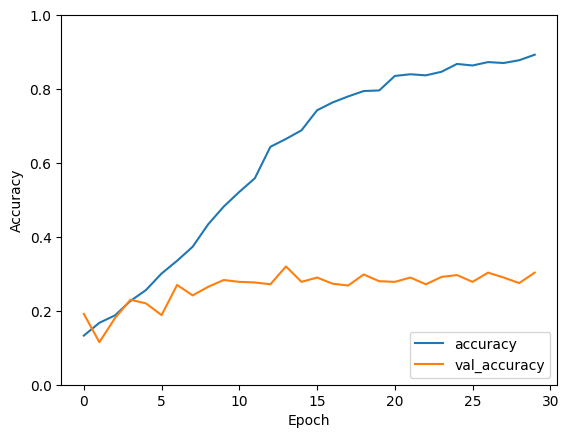

In [ ]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [ ]:
# Kompilacja
model2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
history2 = model2.fit(train_dataset, epochs=50, validation_data=valid_dataset,
                    batch_size=32)

Epoch 1/50
75/75 [==============================] - 17s 121ms/step - loss: 4.9495 - accuracy: 0.1496 - val_loss: 2.3416 - val_accuracy: 0.1133
Epoch 2/50
75/75 [==============================] - 8s 104ms/step - loss: 2.1980 - accuracy: 0.2083 - val_loss: 2.3003 - val_accuracy: 0.0900
Epoch 3/50
75/75 [==============================] - 8s 105ms/step - loss: 2.1257 - accuracy: 0.2346 - val_loss: 2.3229 - val_accuracy: 0.1183
Epoch 4/50
75/75 [==============================] - 8s 105ms/step - loss: 2.0962 - accuracy: 0.2492 - val_loss: 2.2486 - val_accuracy: 0.1483
Epoch 5/50
75/75 [==============================] - 8s 105ms/step - loss: 2.0114 - accuracy: 0.2854 - val_loss: 2.3028 - val_accuracy: 0.1800
Epoch 6/50
75/75 [==============================] - 8s 104ms/step - loss: 1.9546 - accuracy: 0.3108 - val_loss: 2.1991 - val_accuracy: 0.1883
Epoch 7/50
75/75 [==============================] - 8s 105ms/step - loss: 1.9256 - accuracy: 0.3054 - val_loss: 2.1784 - val_accuracy: 0.2733
Epoch

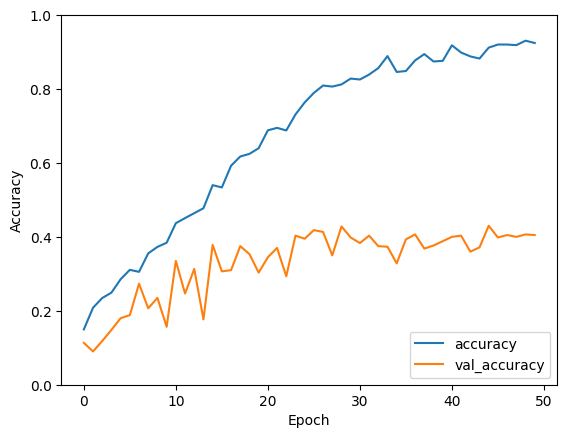

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [ ]:
# Kompilacja
model3.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
history3 = model3.fit(train_dataset, epochs=50, validation_data=valid_dataset,
                    batch_size=32)

Epoch 1/50
75/75 [==============================] - 22s 202ms/step - loss: 10.5780 - accuracy: 0.1496 - val_loss: 2.5301 - val_accuracy: 0.0967
Epoch 2/50
75/75 [==============================] - 14s 184ms/step - loss: 2.2016 - accuracy: 0.2125 - val_loss: 2.3031 - val_accuracy: 0.1150
Epoch 3/50
75/75 [==============================] - 14s 184ms/step - loss: 2.1175 - accuracy: 0.2254 - val_loss: 2.3309 - val_accuracy: 0.0817
Epoch 4/50
75/75 [==============================] - 14s 184ms/step - loss: 2.0413 - accuracy: 0.2654 - val_loss: 2.3120 - val_accuracy: 0.1150
Epoch 5/50
75/75 [==============================] - 14s 184ms/step - loss: 1.9801 - accuracy: 0.2954 - val_loss: 2.3192 - val_accuracy: 0.1167
Epoch 6/50
75/75 [==============================] - 14s 184ms/step - loss: 1.9064 - accuracy: 0.3158 - val_loss: 2.2980 - val_accuracy: 0.1283
Epoch 7/50
75/75 [==============================] - 14s 184ms/step - loss: 1.8589 - accuracy: 0.3433 - val_loss: 2.3550 - val_accuracy: 0.185

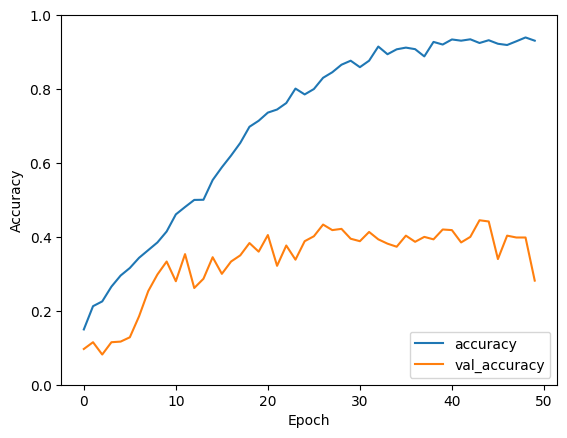

In [ ]:
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [ ]:
# Kompilacja
model4.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
history4 = model4.fit(train_dataset, epochs=80, validation_data=valid_dataset,
                    batch_size=32)

Epoch 1/80
75/75 [==============================] - 17s 186ms/step - loss: 6.9360 - accuracy: 0.1742 - val_loss: 2.3357 - val_accuracy: 0.1083
Epoch 2/80
75/75 [==============================] - 14s 184ms/step - loss: 2.1304 - accuracy: 0.2429 - val_loss: 2.5540 - val_accuracy: 0.1017
Epoch 3/80
75/75 [==============================] - 14s 184ms/step - loss: 2.0660 - accuracy: 0.2608 - val_loss: 2.3329 - val_accuracy: 0.1017
Epoch 4/80
75/75 [==============================] - 14s 184ms/step - loss: 1.9973 - accuracy: 0.2954 - val_loss: 2.3071 - val_accuracy: 0.1183
Epoch 5/80
75/75 [==============================] - 14s 184ms/step - loss: 1.9375 - accuracy: 0.3121 - val_loss: 2.3317 - val_accuracy: 0.1367
Epoch 6/80
75/75 [==============================] - 14s 184ms/step - loss: 1.8368 - accuracy: 0.3504 - val_loss: 2.3669 - val_accuracy: 0.1483
Epoch 7/80
75/75 [==============================] - 14s 184ms/step - loss: 1.7540 - accuracy: 0.3950 - val_loss: 2.2486 - val_accuracy: 0.2417

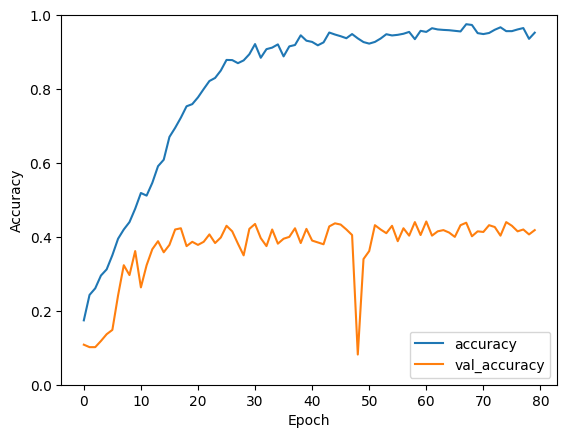

In [ ]:
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [ ]:
result = model1.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(result["accuracy"]*100,2)}%')

32/32 [==============================] - 1s 39ms/step - loss: 4.4141 - accuracy: 0.2940
Dokładność modelu 29.4%


In [ ]:
result = model2.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(result["accuracy"]*100,2)}%')

32/32 [==============================] - 2s 47ms/step - loss: 3.9132 - accuracy: 0.4110
Dokładność modelu 41.1%


In [ ]:
result = model3.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(result["accuracy"]*100,2)}%')

32/32 [==============================] - 2s 74ms/step - loss: 7.5574 - accuracy: 0.2760
Dokładność modelu 27.6%


In [ ]:
result = model4.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(result["accuracy"]*100,2)}%')

32/32 [==============================] - 2s 60ms/step - loss: 5.8327 - accuracy: 0.4480
Dokładność modelu 44.8%
